# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
# traffic_data = pd.read_csv('/content/US_Accidents_March23_sampled_500k.csv')
traffic_data = pd.read_csv('/content/drive/My Drive/BT4240/data/US_Accidents_March23_sampled_500k.csv')

In [4]:
print(traffic_data)

               ID   Source  Severity                     Start_Time  \
0       A-2047758  Source2         2            2019-06-12 10:10:56   
1       A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2       A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3       A-4237356  Source1         2            2022-02-21 17:43:04   
4       A-6690583  Source1         2            2020-12-04 01:46:00   
...           ...      ...       ...                            ...   
499995  A-6077227  Source1         2            2021-12-15 07:30:00   
499996  A-6323243  Source1         2            2021-12-19 16:25:00   
499997  A-3789256  Source1         2            2022-04-13 19:28:29   
499998  A-7030381  Source1         3            2020-05-15 17:20:56   
499999  A-5438901  Source1         2            2022-04-02 23:23:13   

                             End_Time  Start_Lat   Start_Lng    End_Lat  \
0                 2019-06-12 10:55:58  30.641211  -91.153481        NaN 

# Data Cleaning

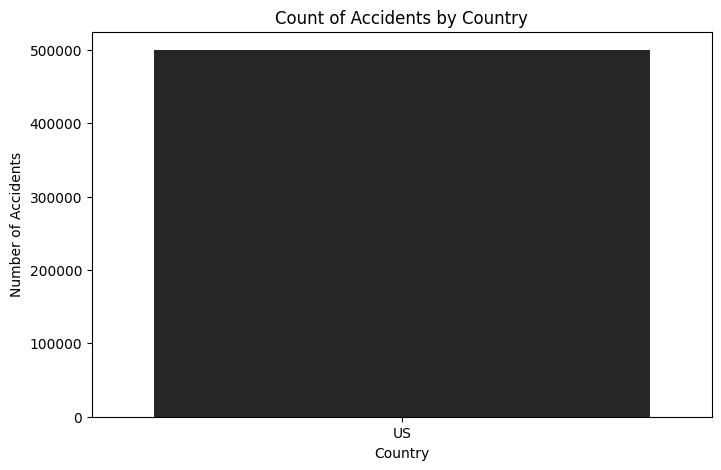

In [5]:
# Bar chart of country
country_counts = traffic_data['Country'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='dark:skyblue')

plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Country")
plt.show()

## Drop useless columns

In [6]:
traffic_data = traffic_data.drop(['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Street', 'County', 'Country', 'Timezone', 'Airport_Code', 'Wind_Chill(F)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
print(traffic_data.shape)

(500000, 31)


## Removing Missing Values

In [7]:
print(traffic_data.columns)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'City', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [8]:
missing_values = traffic_data.isnull().sum()
print(missing_values[missing_values > 0], '\n')

missing_percentage = (traffic_data.isna().sum() / len(traffic_data)) * 100
print(missing_percentage.sort_values(ascending=False))

Description               1
City                     19
Zipcode                 116
Weather_Timestamp      7674
Temperature(F)        10466
Humidity(%)           11130
Pressure(in)           8928
Visibility(mi)        11291
Wind_Direction        11197
Wind_Speed(mph)       36987
Precipitation(in)    142616
Weather_Condition     11101
dtype: int64 

Precipitation(in)    28.5232
Wind_Speed(mph)       7.3974
Visibility(mi)        2.2582
Wind_Direction        2.2394
Humidity(%)           2.2260
Weather_Condition     2.2202
Temperature(F)        2.0932
Pressure(in)          1.7856
Weather_Timestamp     1.5348
Zipcode               0.0232
City                  0.0038
Description           0.0002
Station               0.0000
Give_Way              0.0000
Stop                  0.0000
Roundabout            0.0000
Traffic_Calming       0.0000
Traffic_Signal        0.0000
Railway               0.0000
No_Exit               0.0000
Junction              0.0000
ID                    0.0000
Crossing   

In [37]:
traffic_data_cleaned = traffic_data.dropna()
print(traffic_data_cleaned.shape)

(348687, 31)


## Data Sampling

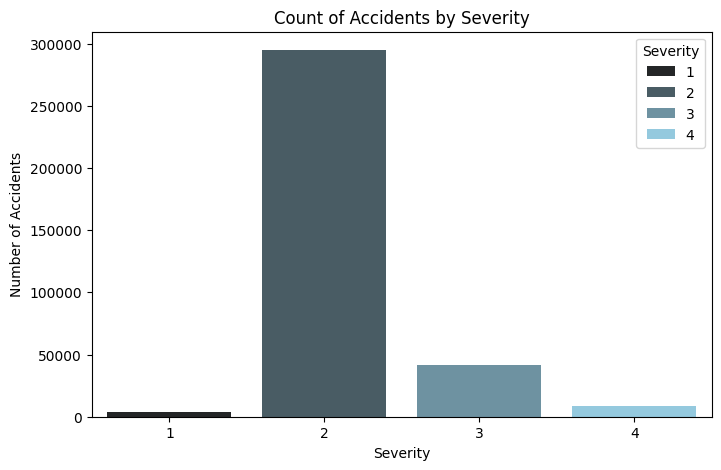

In [101]:
# Bar chart of severity
severity_counts = traffic_data_cleaned['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Severity")
plt.show()

In [102]:
print(severity_counts.values)
print(severity_counts.index)

[294796  41575   8388   3928]
Index([2, 3, 4, 1], dtype='int64', name='Severity')


### Random Sampling for Valid-Test set
Sample valid and test set first to keep original class distribution

In [103]:
valid_test_df = traffic_data_cleaned.sample(n=2000, random_state=42)

## dropped rows of data that are being used for valid-test set
remaining_df = traffic_data_cleaned.drop(valid_test_df.index)

print(valid_test_df.shape)

# valid_df, test_df = train_test_split(valid_test_df, test_size=0.5, random_state=42)

(2000, 31)


In [104]:
print(len(remaining_df))

346687


### Stratefied Sampling for Training set to ensure balanced training data
Use the remaining dataset from previous step, avoid overlapping data in train-test sets

In [105]:
train_df = remaining_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))

print(train_df.shape)
# remaining_df = traffic_data_cleaned.drop(train_df.index)

(8000, 31)


<ipython-input-105-17042f7aea20>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = remaining_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))


### Visualize Class Distribution

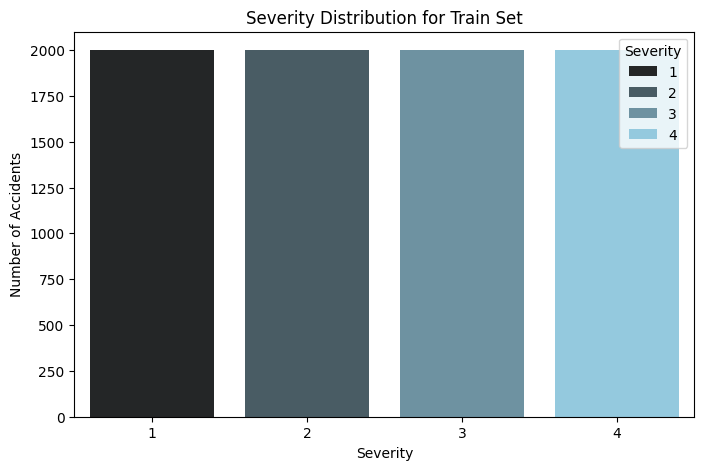

In [106]:
# Bar chart of severity
severity_counts = train_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for Train Set")
plt.show()

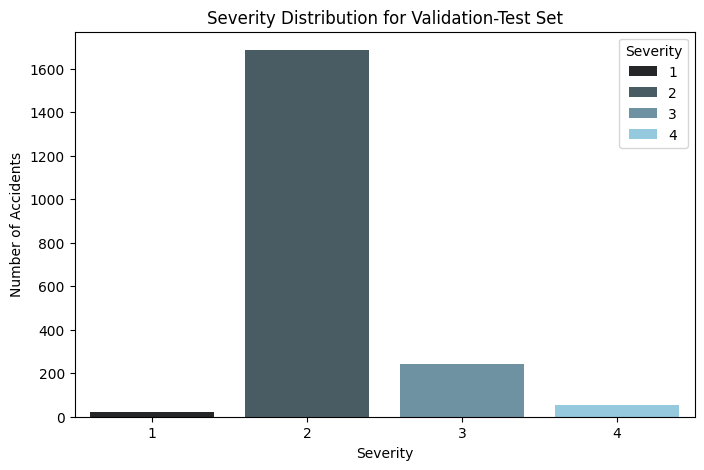

In [107]:
severity_counts = valid_test_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for Validation-Test Set")
plt.show()

#Data Preparation

## Data Encoding for Start_Time Column (convert to minutes after midnight)

In [108]:
## Combine the dataset first since we would need to go through some standardized data preprocessing
sampled_data = pd.concat([train_df, valid_test_df], axis=0)
print(sampled_data.shape)

(10000, 31)


In [109]:
# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

#Convert Start_Time to datetime
sampled_data['Start_Time'] = sampled_data['Start_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['Start_Time'] = pd.to_datetime(sampled_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

object
datetime64[ns]


In [110]:
#Convert to Minutes After Midnight
sampled_data['Start_Time'] = (
    sampled_data['Start_Time'].dt.hour * 60 + sampled_data['Start_Time'].dt.minute
)

print(sampled_data['Start_Time'])

239235      33
355666     484
246955     809
264362     458
195152     349
          ... 
395634     861
492951     354
15664     1251
393801     832
423606     413
Name: Start_Time, Length: 10000, dtype: int32


##Data Encoding for End_Time Column (convert to minutes after midnight)

In [111]:
# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

#Convert End_Time to datetime
sampled_data['End_Time'] = sampled_data['End_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['End_Time'] = pd.to_datetime(sampled_data['End_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

object
datetime64[ns]


In [112]:
#Convert to Minutes After Midnight
sampled_data['End_Time'] = (
    sampled_data['End_Time'].dt.hour * 60 + sampled_data['End_Time'].dt.minute
)

print(sampled_data['End_Time'])

239235      63
355666     499
246955     839
264362     488
195152     426
          ... 
395634     992
492951     664
15664     1350
393801     868
423606     525
Name: End_Time, Length: 10000, dtype: int32


##Compute Duration Column using Start_Time and End_Time

In [113]:
sampled_data['Duration'] = sampled_data['End_Time'] - sampled_data['Start_Time']

print(sampled_data['Duration'])

239235     30
355666     15
246955     30
264362     30
195152     77
         ... 
395634    131
492951    310
15664      99
393801     36
423606    112
Name: Duration, Length: 10000, dtype: int32


##Encode Zipcode into Region using First Digit

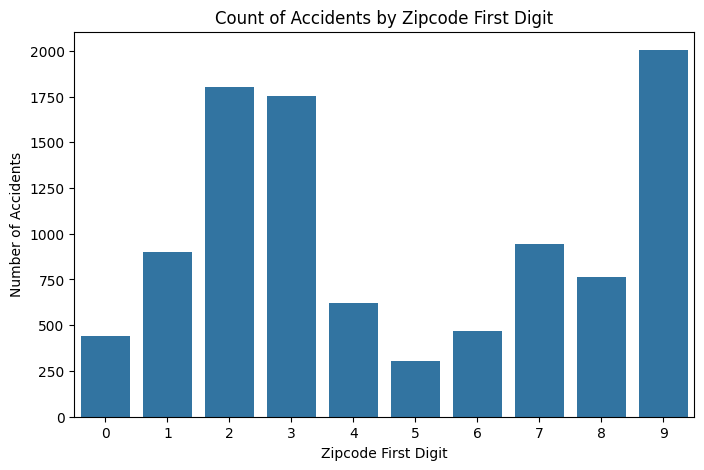

In [114]:
# Bar chart of zipcode
# Extract the first digit of the zip code (assuming the zip code is a string or integer)
sampled_data['Region'] = sampled_data['Zipcode'].str[0]

zipcode_counts = sampled_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

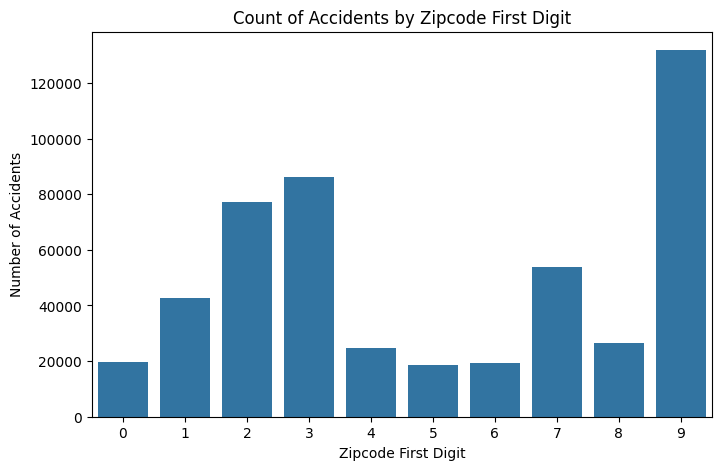

In [115]:
## Compare the distribution with original dataset
traffic_data['Region'] = traffic_data['Zipcode'].str[0]

zipcode_counts = traffic_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

##Encode 'State' into Top 3 States and None of the Above

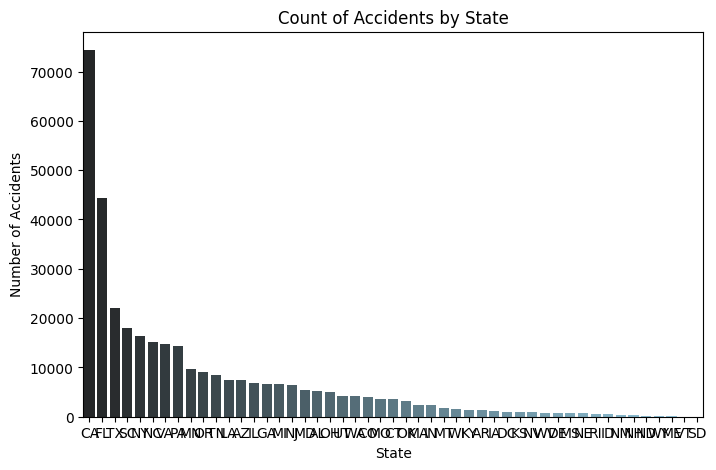

In [116]:
# Bar chart of state
## Use the original traffic data since the sampled data distribution might be distorted due to stratefied sampling
state_counts = remaining_df['State'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State")
plt.show()

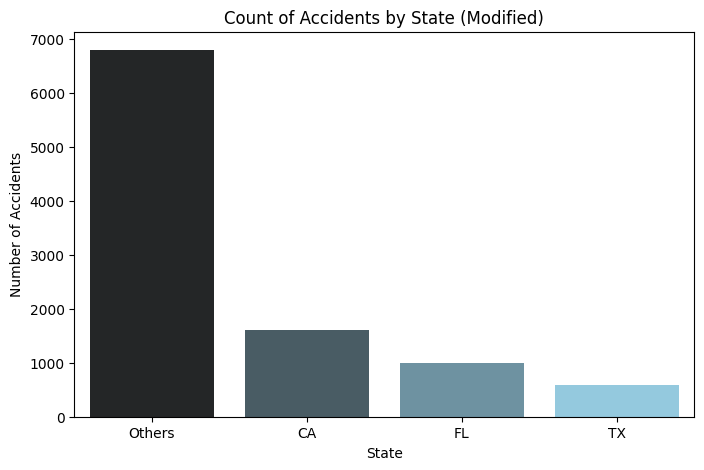

In [117]:
# Get the top 3 states
top_3 = state_counts.nlargest(3)

# Create a mapping where top 3 states are kept, and others are labeled as 'Others'
state_mapping = state_counts.index.to_series().apply(lambda x: x if x in top_3.index else 'Others')

# Apply the mapping to the 'State' column
sampled_data['State'] = sampled_data['State'].map(state_mapping)

# new Bar Chart for State
state_counts = sampled_data['State'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State (Modified)")
plt.show()

In [118]:
# Perform One-Hot Encoding on the 'State' column
state_dummies = pd.get_dummies(sampled_data['State'], prefix='State')

# Convert True/False to 1/0 explicitly
state_dummies = state_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, state_dummies], axis=1)

# Drop the original 'State' column
sampled_data.drop(columns=['State'], inplace=True)

#print(sampled_data.head())

##Encode 'City' into Top 5 Cities and None of the above

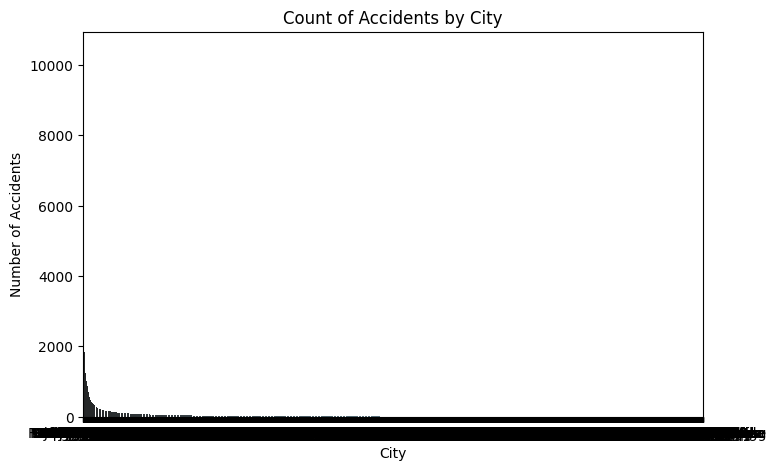

In [119]:
# Bar chart of city
## Use remaining_df (original dataset without valid-test set, to prevent data leakage and maintaining original data distribution)
city_counts = remaining_df['City'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City")
plt.show()

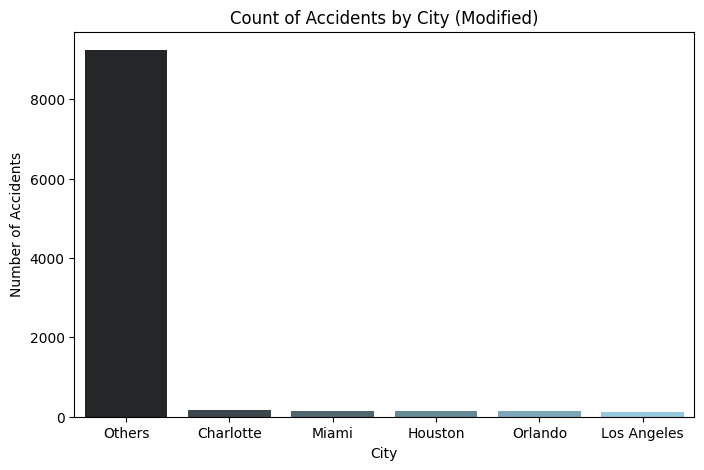

In [120]:
# Get the top 5 cities
top_5 = city_counts.nlargest(5)

# Create a mapping where top 5 cities are kept, and others are labeled as 'Others'
city_mapping = city_counts.index.to_series().apply(lambda x: x if x in top_5.index else 'Others')

# Apply the mapping to the 'City' column
sampled_data['City'] = sampled_data['City'].map(city_mapping)

# new Bar Chart for City
city_counts = sampled_data['City'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City (Modified)")
plt.show()

In [121]:
# Perform One-Hot Encoding on the 'City' column
city_dummies = pd.get_dummies(sampled_data['City'], prefix='City')

# Convert True/False to 1/0 explicitly
city_dummies = city_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, city_dummies], axis=1)

# Drop the original 'City' column
sampled_data.drop(columns=['City'], inplace=True)

#print(sampled_data.head())

## Cluster 'Weather_Condition' into 5 Broad Categories then One-Hot Encoding


In [122]:
## Using remaining_df to get more weather_condition categories but still excluding valid and test data
print(remaining_df['Weather_Condition'].unique())

['Fair' 'Wintry Mix' 'Light Rain' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Fog' 'T-Storm' 'Light Snow' 'Overcast' 'Thunder'
 'Light Rain with Thunder' 'Rain' 'Showers in the Vicinity'
 'Mostly Cloudy / Windy' 'Heavy Rain' 'Cloudy / Windy' 'Light Drizzle'
 'Heavy T-Storm' 'Light Rain / Windy' 'Smoke' 'Blowing Dust / Windy'
 'Haze' 'N/A Precipitation' 'Thunder in the Vicinity' 'Snow'
 'Scattered Clouds' 'Heavy Thunderstorms and Rain' 'Fair / Windy'
 'Patches of Fog' 'Light Snow / Windy' 'Blowing Snow / Windy' 'Drizzle'
 'T-Storm / Windy' 'Partly Cloudy / Windy' 'Shallow Fog' 'Clear'
 'Thunderstorms and Rain' 'Heavy Rain / Windy' 'Heavy Snow / Windy'
 'Light Thunderstorms and Rain' 'Rain / Windy' 'Light Freezing Rain'
 'Heavy Snow' 'Light Ice Pellets' 'Light Freezing Drizzle'
 'Heavy T-Storm / Windy' 'Heavy Drizzle' 'Sleet' 'Mist'
 'Light Rain Shower' 'Haze / Windy' 'Snow and Sleet' 'Snow / Windy'
 'Thunderstorm' 'Fog / Windy' 'Sleet / Windy' 'Light Sleet'
 'Sand / Dust Whirlwinds' 'Squ

In [123]:
# Mapping for standardizing weather conditions to 5 categories and "Others"
weather_mapping = {
    # Cloud is grouped in the same category as Clear as cloudy doesnt really affect traffic conditions that much
    'Clear': 'Clear / Cloudy', 'Cloudy': 'Clear / Cloudy', 'Partly Cloudy': 'Clear / Cloudy',
    'Mostly Cloudy': 'Clear / Cloudy', 'Overcast': 'Clear / Cloudy', 'Fair': 'Clear / Cloudy',
    'Fair / Windy': 'Clear / Cloudy', 'Mostly Cloudy / Windy': 'Clear / Cloudy', 'Partly Cloudy / Windy': 'Clear / Cloudy',
    'Cloudy / Windy': 'Clear / Cloudy', 'Scattered Clouds': 'Clear / Cloudy',

    'Light Rain': 'Rain', 'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain Shower': 'Rain',
    'Rain / Windy': 'Rain', 'Heavy Rain / Windy': 'Rain', 'Drizzle': 'Rain',
    'Light Freezing Drizzle': 'Rain', 'Light Rain with Thunder': 'Rain', 'Light Drizzle': 'Rain',
    'Light Freezing Rain': 'Rain', 'Freezing Drizzle': 'Rain', 'Showers in the Vicinity': 'Rain',
    'Light Rain / Windy': 'Rain', 'Heavy Drizzle': 'Rain', 'Light Freezing Rain / Windy': 'Rain',
    'Light Drizzle / Windy': 'Rain', 'Freezing Rain': 'Rain', 'Light Rain Showers': 'Rain',
    'Light Rain Shower / Windy': 'Rain', 'Rain Showers': 'Rain', 'Drizzle / Windy': 'Rain',

    'Light Snow': 'Snow', 'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Snow / Windy': 'Snow',
    'Light Snow Shower': 'Snow', 'Snow Grains': 'Snow', 'Blowing Snow': 'Snow',
    'Light Snow / Windy': 'Snow', 'Heavy Snow / Windy': 'Snow', 'Light Snow with Thunder': 'Snow',
    'Light Snow and Sleet': 'Snow', 'Snow and Sleet': 'Snow', 'Sleet / Windy': 'Snow',
    'Light Snow Showers': 'Snow', 'Light Snow and Sleet / Windy': 'Snow', 'Snow and Sleet / Windy': 'Snow',
    'Sleet': 'Snow', 'Light Sleet': 'Snow', 'Light Snow Showers': 'Snow', 'Ice Pellets': 'Snow',
    'Blowing Snow': 'Snow', 'Drifting Snow / Windy': 'Snow', 'Blowing Snow / Windy': 'Snow',
    'Snow and Thunder': 'Snow', 'Wintry Mix / Windy': 'Snow', 'Heavy Sleet': 'Snow',
    'Light Snow Grains': 'Snow', 'Light Blowing Snow': 'Snow', 'Light Ice Pellets': 'Snow',

    'Fog': 'Fog / Low Visibility', 'Shallow Fog': 'Fog / Low Visibility', 'Mist': 'Fog / Low Visibility',
    'Light Freezing Fog': 'Fog / Low Visibility', 'Fog / Windy': 'Fog / Low Visibility',
    'Partial Fog / Windy': 'Fog / Low Visibility', 'Drizzle and Fog': 'Fog / Low Visibility',
    'Patches of Fog': 'Fog / Low Visibility', 'Haze / Windy': 'Fog / Low Visibility',
    'Partial Fog': 'Fog / Low Visibility', 'Smoke': 'Fog / Low Visibility', 'Haze': 'Fog / Low Visibility',
    'Blowing Dust': 'Fog / Low Visibility', 'Blowing Dust / Windy': 'Fog / Low Visibility',
    'Sand / Dust Whirlwinds': 'Fog / Low Visibility', 'Widespread Dust': 'Fog / Low Visibility',
    'Smoke / Windy': 'Fog / Low Visibility', 'Widespread Dust / Windy': 'Fog / Low Visibility',

    'Thunderstorm': 'Thunderstorms / Severe Weather', 'T-Storm': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm': 'Thunderstorms / Severe Weather', 'Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Light Thunderstorms and Rain': 'Thunderstorms / Severe Weather', 'Thunder / Windy': 'Thunderstorms / Severe Weather',
    'Thunder in the Vicinity': 'Thunderstorms / Severe Weather', 'Heavy Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Tornado': 'Thunderstorms / Severe Weather', 'Thunder / Wintry Mix': 'Thunderstorms / Severe Weather', 'Light Thunderstorms and Snow': 'Thunderstorms / Severe Weather',
    'Wintry Mix': 'Thunderstorms / Severe Weather', 'Thunder': 'Thunderstorms / Severe Weather', 'T-Storm / Windy': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm / Windy': 'Thunderstorms / Severe Weather', 'Funnel Cloud': 'Thunderstorms / Severe Weather', 'Thunder and Hail': 'Thunderstorms / Severe Weather',
    'Hail': 'Thunderstorms / Severe Weather', 'Squalls': 'Thunderstorms / Severe Weather', 'Volcanic Ash': 'Thunderstorms / Severe Weather',
    'Squalls / Windy': 'Thunderstorms / Severe Weather', 'Small Hail': 'Thunderstorms / Severe Weather', 'Light Hail': 'Thunderstorms / Severe Weather',

    # Grouping other categories as "Others"
    'N/A Precipitation': 'Others'
}

sampled_data['Weather_Condition'] = sampled_data['Weather_Condition'].map(weather_mapping).fillna('Others')

# Label Encoding (for random forest model)
label_encoder = LabelEncoder()
sampled_data['Weather_Condition_Encoded'] = label_encoder.fit_transform(sampled_data['Weather_Condition'])

#print(sampled_data['Weather_Condition'])
#print(sampled_data['Weather_Condition_Encoded'])

In [124]:
print(sampled_data['Weather_Condition'])
print(sampled_data['Weather_Condition_Encoded'])

239235    Clear / Cloudy
355666    Clear / Cloudy
246955    Clear / Cloudy
264362    Clear / Cloudy
195152    Clear / Cloudy
               ...      
395634    Clear / Cloudy
492951    Clear / Cloudy
15664     Clear / Cloudy
393801    Clear / Cloudy
423606    Clear / Cloudy
Name: Weather_Condition, Length: 10000, dtype: object
239235    0
355666    0
246955    0
264362    0
195152    0
         ..
395634    0
492951    0
15664     0
393801    0
423606    0
Name: Weather_Condition_Encoded, Length: 10000, dtype: int64


In [125]:
# Perform One-Hot Encoding on the 'Weather_Condition' column
weather_condition_dummies = pd.get_dummies(sampled_data['Weather_Condition'], prefix='Weather_Condition')

# Convert True/False to 1/0 explicitly
weather_condition_dummies = weather_condition_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_condition_dummies], axis=1)

# Drop the original 'Weather_Condition' column
sampled_data.drop(columns=['Weather_Condition'], inplace=True)

print(sampled_data.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
239235  A-7056206         1          33        63          0.00   
355666  A-7143912         1         484       499          0.00   
246955   A-540674         1         809       839          0.15   
264362   A-633728         1         458       488          0.00   
195152   A-614503         1         349       426          0.00   

                                              Description     Zipcode  \
239235     At Tubbs Ln - Accident. Hard shoulder blocked.       94567   
355666  At Sausalito Lateral Rd - Accident. Hard shoul...       94965   
246955  Crash on entry ramp to Wa-167 Northbound from ...       98390   
264362              Crash on San Pedro Dr at Menaul Blvd.  87110-3240   
195152                 Crash on 114th Ave near 193rd Ter.  33157-8108   

          Weather_Timestamp  Temperature(F)  Humidity(%)  ...  City_Miami  \
239235  2020-06-24 00:53:00            56.0         90.0  ...           0   
3556

## Convert Boolean Columns from "True"/"False" to 1/0

In [126]:
boolean_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Convert string 'True'/'False' to actual boolean values
sampled_data[boolean_columns] = sampled_data[boolean_columns].replace({'True': True, 'False': False})

# Convert True/False to 1/0 for the specified columns
sampled_data[boolean_columns] = sampled_data[boolean_columns].astype(int)

# print(sampled_data[boolean_columns].head())

#Train, Validate, Test Split (80-10-10)

In [ ]:
train_data = sampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))

valid_test_data = sampled_data.drop(train_df.index)

validate_data, test_data = train_test_split(valid_test_data, test_size=0.5, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", validate_data.shape)
print("Test Set Shape:", test_data.shape)

Training Set Shape: (8000, 47)
Validation Set Shape: (1000, 47)
Test Set Shape: (1000, 47)


<ipython-input-128-67ad7d328223>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = sampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))


In [ ]:
# # Split the data into training (80%) and temporary set (20%)
# train_data, temp_data = train_test_split(sampled_data, test_size=0.2, random_state=42)

# # Split the temporary set into validation (50%) and test (50%) — both 10% of the total data
# validate_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# # Check the shapes of the resulting sets
# print("Training Set Shape:", train_data.shape)
# print("Validation Set Shape:", validate_data.shape)
# print("Test Set Shape:", test_data.shape)

Training Set Shape: (8000, 47)
Validation Set Shape: (1000, 47)
Test Set Shape: (1000, 47)


In [129]:
save_file_path = '/content/drive/My Drive/BT4240/data'
# Save the training dataset
train_data.to_csv(f"{save_file_path}/train_data.csv", index=False)

# Save the validation dataset
validate_data.to_csv(f"{save_file_path}/validate_data.csv", index=False)

# Save the test dataset
test_data.to_csv(f"{save_file_path}/test_data.csv", index=False)